<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/Splits_in_DTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [16]:
data = pd.read_csv("fish.csv")
data.head()

,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna


In [17]:
data.type = data.type.apply(lambda x:1 if x =='salmon' else 0)
data

,length,weight,type
0,8.618381,7.848030,0
1,2.522046,8.762507,0
2,2.035690,7.101971,0
3,6.695008,4.953932,1
4,9.834069,7.908453,0
...,...,...,...
995,3.710186,0.956612,1
996,3.749596,9.557450,1
997,2.410087,3.355781,0
998,0.990773,3.812210,0


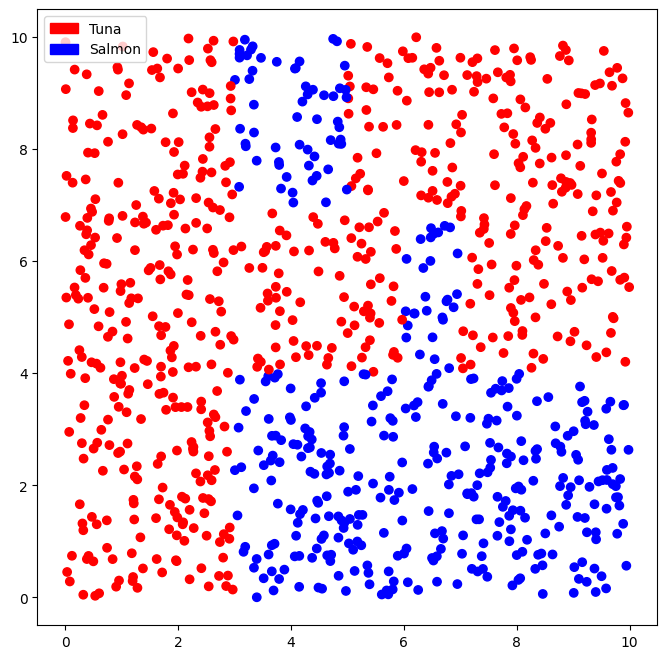

In [51]:
fig = plt.figure(figsize=(8,8))
plt.scatter(data.length, data.weight, color = ['red' if f==0 else 'blue' for f in data.type])
tuna_patch = mpatches.Patch(color='red', label='Tuna')
salmon_patch = mpatches.Patch(color='blue', label='Salmon')
plt.legend(handles=[tuna_patch, salmon_patch], prop={'size': 10})
plt.show()

In [55]:
def get_entropy(value):
  p = np.mean(value)
  if p==0 or p==1:
    return 0
  return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [60]:
print(get_entropy([0,0,0,0,0,0]))
print(get_entropy([0,0,0,0,0,1]))
print(get_entropy([0,0,0,0,1,1]))
print(get_entropy([0,0,0,1,1,1]))
print(get_entropy([0,0,1,1,1,1]))
print(get_entropy([0,1,1,1,1,1]))
print(get_entropy([1,1,1,1,1,1]))

0
0.6500224216483541
0.9182958340544896
1.0
0.9182958340544896
0.6500224216483541
0


In [63]:
def get_entropy_from_splitting(data, feature, val):
  left_types = data[data[feature] < val].type
  right_types = data[data[feature] >= val].type

  left_entropy = get_entropy(left_types)
  right_entropy = get_entropy(right_types)

  left_p = len(left_types) / len(data)
  right_p = len(right_types) / len(data)

  return left_p*left_entropy + right_p*right_entropy

In [69]:
features = ['length', 'weight']

best_parameters = {'feature':None, 'val':None, 'entropy':np.inf}
for f in features:
  curr = data[f].min()
  step = 0.1
  while curr < data[f].max():
    curr_entropy = get_entropy_from_splitting(data, f, curr)
    if curr_entropy < best_parameters['entropy']:
      best_parameters['feature'] = f
      best_parameters['val'] = curr
      best_parameters['entropy'] = curr_entropy
    curr +=step
print(f'First Split: {best_parameters}')

First Split: {'feature': 'length', 'val': 3.0065456626365483, 'entropy': 0.6843553171032571}


In [66]:
curr_df = data.copy()
curr_df = curr_df[curr_df.length>3]

In [70]:
features = ['length', 'weight']

best_parameters = {'feature':None, 'val':None, 'entropy':np.inf}
for f in features:
  curr = curr_df[f].min()
  step = 0.1
  while curr < curr_df[f].max():
    curr_entropy = get_entropy_from_splitting(curr_df, f, curr)
    if curr_entropy < best_parameters['entropy']:
      best_parameters['feature'] = f
      best_parameters['val'] = curr
      best_parameters['entropy'] = curr_entropy
    curr +=step
print(f'Second Split: {best_parameters}')

Second Split: {'feature': 'weight', 'val': 4.001260199577321, 'entropy': 0.426763555582736}
